In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy
from scipy.fftpack import fft,fftfreq, fftshift

In [2]:
df=pd.read_csv("2months.csv",parse_dates=['Date Time'],header=int(0))

In [3]:
df.head()

,Date Time,Water Level,Sigma,I,L
0,2017-01-01 00:00:00,1.322,0.059,0,0
1,2017-01-01 01:00:00,1.739,0.075,0,0
2,2017-01-01 02:00:00,2.096,0.085,0,0
3,2017-01-01 03:00:00,2.477,0.079,0,0
4,2017-01-01 04:00:00,2.392,0.082,0,0


In [4]:
df.describe()

,Water Level,Sigma,I,L
count,1416.000000,1416.000000,1416.0,1416.0
mean,1.426113,0.079972,0.0,0.0
std,0.968462,0.083728,0.0,0.0
min,-1.243000,0.010000,0.0,0.0
25%,0.753250,0.026000,0.0,0.0
50%,1.457000,0.043000,0.0,0.0
75%,2.072500,0.102750,0.0,0.0
max,4.944000,0.561000,0.0,0.0


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Date Time       0
 Water Level    0
 Sigma          0
 I              0
 L              0
dtype: int64

In [6]:
df.columns=['Date Time','Water Level','Sigma','I','L']

In [7]:
df1=df.loc[abs(df['Water Level']) < 0.09]

In [8]:
df1.head()

,Date Time,Water Level,Sigma,I,L
21,2017-01-01 21:00:00,0.082,0.062,0,0
47,2017-01-02 23:00:00,-0.013,0.059,0,0
195,2017-01-09 03:00:00,-0.062,0.299,0,0
198,2017-01-09 06:00:00,-0.079,0.312,0,0
220,2017-01-10 04:00:00,-0.066,0.030,0,0


In [9]:
df.tail()

,Date Time,Water Level,Sigma,I,L
1411,2017-02-28 19:00:00,0.358,0.020,0,0
1412,2017-02-28 20:00:00,-0.056,0.020,0,0
1413,2017-02-28 21:00:00,-0.581,0.026,0,0
1414,2017-02-28 22:00:00,-0.413,0.016,0,0
1415,2017-02-28 23:00:00,0.351,0.030,0,0


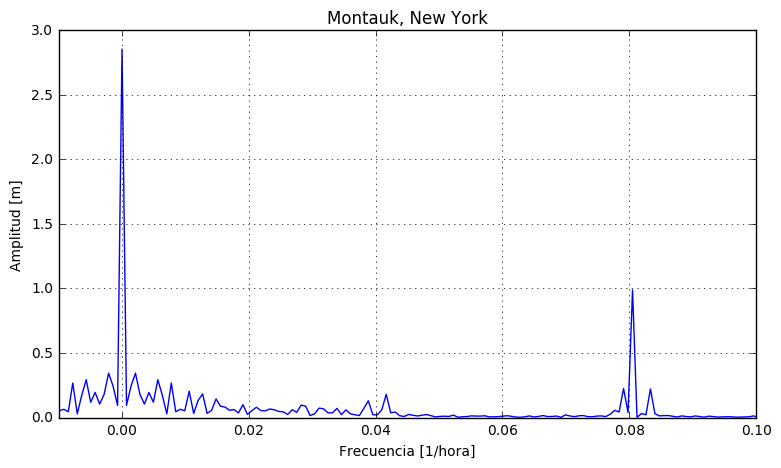

In [16]:
N_d = 1416
T = 1.0
#aplicacion de la transformada de Fourier
y = df["Water Level"] 
yf = fft(y)
xf = fftfreq(N_d, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N_d *abs(yplot))
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]')
plt.ylabel('Amplitud [m]')
plt.title('Montauk, New York')

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()

In [17]:
a= np.absolute(yf/1416)
a[a[:,] > 0.05]
a

array([ 1.42611299,  0.04683983,  0.12138959, ...,  0.17163394,
        0.12138959,  0.04683983])

In [18]:
print(np.where(a[:,]>0.1))
b= a[a[:,]>0.05]
b

(array([   0,    2,    3,    8,   11,   15,  112,  114,  118, 1298, 1302,
       1304, 1401, 1405, 1408, 1413, 1414]),)


array([ 1.42611299,  0.12138959,  0.17163394,  0.08951102,  0.05205966,
        0.0969621 ,  0.05904996,  0.14634901,  0.08591911,  0.13346315,
        0.10156581,  0.06641191,  0.09119693,  0.071934  ,  0.06453766,
        0.08965534,  0.11238667,  0.49376693,  0.1107339 ,  0.1107339 ,
        0.49376693,  0.11238667,  0.08965534,  0.06453766,  0.071934  ,
        0.09119693,  0.06641191,  0.10156581,  0.13346315,  0.08591911,
        0.14634901,  0.05904996,  0.0969621 ,  0.05205966,  0.08951102,
        0.17163394,  0.12138959])

In [19]:
print( 'Primer Armónico notorio')
print('Amplitud=',np.absolute(yf[55,]/1416))
print('frecuencia=', xf[int(708 +55),])
print('periodo=', 1/xf[int(708 +55),])

print()
print('Segundo Armónico notorio')
print('Amplitud=',np.absolute(yf[59,]/1416))
print('frecuencia=', xf[int(708 +59),])
print('periodo=', 1/xf[int(708 +59),])

print()
print('Tercer Armónico notorio')
print('Amplitud=',np.absolute(yf[112,]/1416))
print('frecuencia=', xf[int(708 +112),])
print('periodo=', 1/xf[int(708 +112),])

print()
print('Cuarto Armónico notorio')
print('Amplitud=',np.absolute(yf[114,]/1416))
print('frecuencia=', xf[int(708 +114),])
print('periodo=', 1/xf[int(708 +114),])

print()
print('Quinto Armónico notorio')
print('Amplitud=',np.absolute(yf[118,]/1416))
print('frecuencia=', xf[int(708 +118),])
print('periodo=', 1/xf[int(708 +118),])

Primer Armónico notorio
Amplitud= 0.0645376624173
frecuencia= 0.0388418079096
periodo= 25.7454545455

Segundo Armónico notorio
Amplitud= 0.0896553374437
frecuencia= 0.0416666666667
periodo= 24.0

Tercer Armónico notorio
Amplitud= 0.112386672643
frecuencia= 0.0790960451977
periodo= 12.6428571429

Cuarto Armónico notorio
Amplitud= 0.493766933602
frecuencia= 0.0805084745763
periodo= 12.4210526316

Quinto Armónico notorio
Amplitud= 0.110733903979
frecuencia= 0.0833333333333
periodo= 12.0


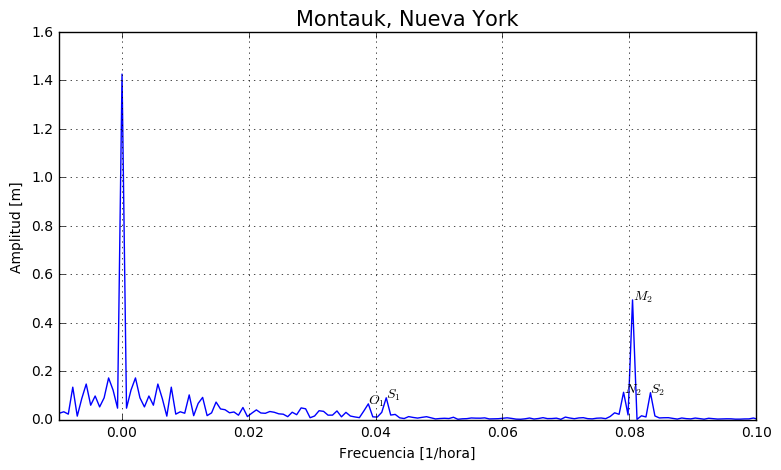

In [20]:
fig = plt.gcf()
fig.set_size_inches(9, 5)


graf = plt.plot(xf, 1.0/1416 *abs(yplot))
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]')
plt.ylabel('Amplitud [m]')
plt.title('Montauk, Nueva York', fontsize=15)

plt.text(0.0388418079096, 0.0645376624173, '$O_1$')
plt.text(0.0416666666667, 0.0896553374437, '$S_1$')
plt.text(0.0790960451977, 0.112386672643, '$N_2$')
plt.text(0.0805084745763, 0.493766933602, '$M_2$')
plt.text(0.0833333333333, 0.110733903979, '$S_2$')

plt.show()